## Mini Project 2 
Group 36, Megan Gross, ID: 24650006

In this report, the problem needing to be solved was estimating the percentage of body fat for men based on different measurements such as age, weight, height, length of chest, and many more. 

Firstly, mount drive and navigate to folder containing data for this project.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Colab Notebooks/AT2_group36_24650006_miniP2_notebook

/content/gdrive/MyDrive/Colab Notebooks/AT2_group36_24650006_miniP2_notebook


Import proper libraries needed for completion of task. 

Pandas is used for data analysis and manipulation. NumPy is used for mathematical operations. TensorFlow is used for developing the neural network. Matplotlib.pyplot is used for data visualization, more specifically for displaying the regression plot. Sklearn is used for machine learning and manipulating the data set into training and test sets. Keras is used for deep learning and implementing the neural network.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.models import load_model, save_model
from keras.layers import Dense

Read in the data file named 'bodyfat' and label columns. X1, x2, x3...etc are all input data columns, and y is the output or classification label for the corresponding data.

In [4]:
df=pd.read_csv('bodyfat.csv',names=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','y'])

As stated above, the first 14 columns are the data entries, and the fifteenth column is the classification label (either a 1 for nasal sound or 2 for oral sound.) This data is split accordingly into variables.

So the _data_ variable is the inputs to be classified, and the _label_ variable is the label or class classification. 

In [5]:
data=df.iloc[:,0:14]
label=df.iloc[:,-1]

This method splits the data into training or test sets. The test set size is set at 0.2 which means 20% of the data will go to the test set.

In [6]:
trainData, testData, trainLabel, testLabel = train_test_split(data, label, test_size = 0.2, random_state = 42)

This is used for verification that the data was split properly. It is not neccessary for the algorithm but useful for debugging!

In [7]:
print(df.shape)
print(trainData.values)
print(trainLabel.values)

(252, 15)
[[  1.0491  39.     166.75   ...  32.7     28.3     17.1   ]
 [  1.0473  54.     198.     ...  35.9     30.2     18.9   ]
 [  1.0209  44.     223.     ...  34.8     30.7     17.4   ]
 ...
 [  1.0795  47.     165.25   ...  30.1     28.2     18.4   ]
 [  1.0603  39.     234.75   ...  39.1     32.5     19.9   ]
 [  1.053   41.     172.75   ...  31.      29.2     18.4   ]]
[21.8 22.6 34.8 13.6 29.6 10.3 12.4 24.7 29.3  3.  27.2 11.3 12.5 18.8
 11.  12.4  6.6 22.1 13.5 12.9 18.1 18.5 21.3 25.8 27.9 29.9 27.   8.8
 34.3 20.3 26.7 20.9 20.4 13.1 25.2 17.3 30.  29.4 17.4 47.5  9.4  5.7
 20.8 40.1  3.7 31.6 26.  15.6 24.9 17.5 25.4  6.6 26.7 17.4 17.  22.1
  8.8 32.9 24.8 21.  21.5 16.1  7.9 32.6 17.7 11.4 20.4 12.3 25.3 22.2
 10.8 21.2 15.2 10.1  0.  20.5 26.6 29.9 17.8 24.2 29.8 27.3 18.3  7.8
 30.2 12.2 22.9 17.3 28.7 14.7 11.8 19.2 26.6 22.4 30.7 27.1 20.8 14.9
 10.9 24.3 22.8 32.3  7.7 26.  34.5 16.  16.5 17.7 19.5  8.6 26.8 32.6
 27.2  5.6  9.  15.9 14.6 32.  14.2 16.9 10.4 18. 

Set aside two sample data sets to be used in the future for validation of results. Remove the sample data set values from the train and test arrays. 

In [8]:
futureSampleData= testData[-2:]
futureSampleLabel= testLabel[-2:]
testData = testData[:-2]
testLabel = testLabel[:-2]

Start to build the feed-forward neural network. The training data set (trainData) will be used to develop the model. The activation function ReLU (Rectified Linear Units) outputs the input if it's positive, otherwise it outputs 0. There 4 layers which can be checked with len(model.layers)

In [9]:
input_dim   = trainData.shape[1] 
neuron_1   = 512            
neuron_2   = 512            
neuron_3   = 100            
epochs      = 500         

In [10]:
model = tf.keras.Sequential() 
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(Dense(neuron_1,activation='relu'))
model.add(Dense(neuron_2,activation='relu'))
model.add(Dense(neuron_3,activation='relu'))
model.add(Dense(1))

In [11]:
print (len(model.layers))

4


Build the model.

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7680      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 321,737
Trainable params: 321,737
Non-trainable params: 0
_________________________________________________________________


Compile the model using the fit() method and training data and labels. Set the epochs to the previously defined value. Set the batch size to an appropiate number. Verbose should equal 0, use 1 if you wish to see what is happening with each iteration.

In [13]:
model.fit(trainData, trainLabel, epochs=epochs, batch_size=10, verbose=0) 

The predict() method -just as its name sounds- will be used to calculate the predicted values of the test data.

In [14]:
prediction = model.predict(testData)

A variety of methods is used to evalue the perfomance.

R2 score is used to measure how much variability in the dependent variable can be explained by the model. The larger the number the better the fit. 

MAE (Mean Absolute Error) is the sum of the absolute value of error and is a more direct representation of sum of error terms.

MAPE (Mean Absolute Percentage Error) is similar to MAE except it is the average percentage of error between the actual and estimated value. The closer to zero it is, the better the model.

MSE (Root Mean Squared Error) is the root of the sum of the square of the prediction error. It gives a number on how much the predicted results deviate from the actual number. 

In [15]:
metrics.r2_score(testLabel, prediction)

0.5623266454734882

In [16]:
metrics.mean_absolute_error(testLabel, prediction)

3.5911214439236385

In [17]:
flat = [x for sublist in prediction for x in sublist]
def MAPE(y, predY):
    return np.mean(np.abs((y - predY) / y)) * 100

MAPE(testLabel.values, flat)

26.768943076743874

In [18]:
metrics.mean_squared_error(testLabel, prediction)**0.5

4.236950934694408

Regression plot for visualization of results. 

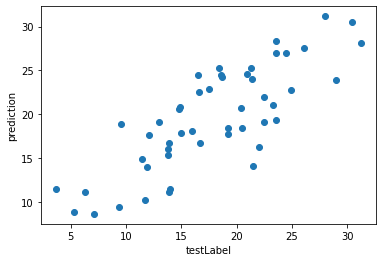

In [19]:
plt.scatter(testLabel, prediction)
plt.xlabel('testLabel')
plt.ylabel('prediction')
plt.show()

To prevent unneccessary processing time, save the model and then reload it when neccessary so time is not wasted waiting for the model to be fit again. This is good practice as model fitting can take many hours with larger datasets.

In [20]:
model.save("bodyFatRegression_model.h5")

In [21]:
loadedModel = load_model ('bodyFatRegression_model.h5')

In [22]:
loadedModel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7680      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 321,737
Trainable params: 321,737
Non-trainable params: 0
_________________________________________________________________


Using the sample data sets set aside earlier (futureSampleData and futureSampleLabel) predict the classes and compare to the actual value.

In [23]:
futurePrediction = loadedModel.predict(futureSampleData)

In [24]:
for i in range (2):
    print("The future data is  {},\n the predicted value is  {} and the actual value is {} \n".format(futureSampleData.values[i],futurePrediction[i],futureSampleLabel.values[i]))

The future data is  [  1.0763  37.     145.25    69.25    36.      96.8     79.4     89.2
  50.3     34.8     22.2     31.      26.9     16.9   ],
 the predicted value is  [10.359799] and the actual value is 9.9 

The future data is  [  1.0202  46.     363.15    72.25    51.2    136.2    148.1    147.7
  87.3     49.1     29.6     45.      29.      21.4   ],
 the predicted value is  [47.104897] and the actual value is 35.2 

